In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data
general_data = pd.read_csv("../population-segmentation-data/general_data.csv", sep=";")
customer_data = pd.read_csv("../population-segmentation-data/customer_data.csv", sep=";")
train_data = pd.read_csv("../population-segmentation-data/train_data.csv", sep=";")
test_data = pd.read_csv("../population-segmentation-data/test_data.csv", sep=";")

In [3]:
customer_data.head()

,Unnamed: 0,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
0,0,2,1.0,10.0,10.0,1.0,0.0,0.0,2.0,1.0,...,7.0,3,0,1,4,0,1,1,0,0
1,1,-1,9.0,11.0,-1.0,-1.0,-1.0,0.0,3.0,-1.0,...,-1.0,3,0,1,4,1,0,0,0,1
2,2,-1,1.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2.0,3,0,2,4,0,1,1,0,0
3,3,1,1.0,8.0,8.0,0.0,-1.0,0.0,0.0,1.0,...,7.0,1,0,1,4,0,1,0,1,0
4,4,-1,1.0,20.0,14.0,7.0,0.0,0.0,4.0,7.0,...,3.0,1,0,1,3,0,1,0,0,1


In [4]:
# Getting the name of the first column
extra_col = list(general_data.columns)[0]
print(extra_col)

# Removing the extra column in every dataframe since it is redundant
general_data.drop(extra_col, axis=1, inplace=True)
customer_data.drop(extra_col, axis=1, inplace=True)
train_data.drop(extra_col, axis=1, inplace=True)
test_data.drop(extra_col, axis=1, inplace=True)

Unnamed: 0


In [5]:
customer_data.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
0,2,1.0,10.0,10.0,1.0,0.0,0.0,2.0,1.0,0.0,...,7.0,3,0,1,4,0,1,1,0,0
1,-1,9.0,11.0,-1.0,-1.0,-1.0,0.0,3.0,-1.0,0.0,...,-1.0,3,0,1,4,1,0,0,0,1
2,-1,1.0,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,2.0,3,0,2,4,0,1,1,0,0
3,1,1.0,8.0,8.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,7.0,1,0,1,4,0,1,0,1,0
4,-1,1.0,20.0,14.0,7.0,0.0,0.0,4.0,7.0,0.0,...,3.0,1,0,1,3,0,1,0,0,1


In [6]:
# Normalzing the data so that every column is on a 0 to 1 scale

# Importing the scaler
from sklearn.preprocessing import MinMaxScaler

# Creating the scaler
scaler = MinMaxScaler()

# Fitting the scaler to the customer data and transforming
customer_data_scaled = scaler.fit_transform(customer_data)

In [61]:
# import the PCA class from scikit learn
from sklearn.decomposition import PCA

# Defining the maximum number of principal components to fit the model
num_components = len(list(customer_data.columns)) - 1

# Creating a PCA model
pca = PCA(n_components=num_components)

# Fitting the PCA model
pca.fit(customer_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=363, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [62]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[5.50444166e-01 4.13043542e-02 2.44893077e-02 1.95814997e-02
 1.68829647e-02 1.52744762e-02 1.38610803e-02 1.07930161e-02
 9.96348166e-03 8.64273966e-03 7.85144270e-03 7.46544275e-03
 7.25089390e-03 5.40795060e-03 5.23551043e-03 4.86095110e-03
 4.65122892e-03 4.19547966e-03 4.01260790e-03 3.94345652e-03
 3.82477934e-03 3.78297882e-03 3.67448924e-03 3.60491687e-03
 3.55511107e-03 3.53368142e-03 3.46140981e-03 3.43533795e-03
 3.32341535e-03 3.26013278e-03 3.22219077e-03 3.11569910e-03
 3.04040447e-03 2.90129704e-03 2.75693114e-03 2.70701525e-03
 2.63779741e-03 2.62022772e-03 2.55234215e-03 2.49869568e-03
 2.45067666e-03 2.42886444e-03 2.36598744e-03 2.32454376e-03
 2.29541145e-03 2.27781924e-03 2.22781028e-03 2.20845930e-03
 2.17455567e-03 2.15014798e-03 2.11656893e-03 2.09935817e-03
 2.07032699e-03 2.00577588e-03 1.93197990e-03 1.90023139e-03
 1.88952641e-03 1.83282127e-03 1.81903803e-03 1.77718764e-03
 1.74807615e-03 1.73309576e-03 1.71643709e-03 1.67482060e-03
 1.66731654e-03 1.647914

In [ ]:
def create_variance_plot(explained_var_ratio, num_components):
    """
    Creates a graph that shows the explained variance as a function of the number of principal components
    param explained_var_ratio: A list that holds the explained variance ratio for each component
    param num_components: An integer that specifies that number of components to display in the graph
    return: Use plt.show() to display the graph
    """
    # Getting an array of the cumulative sum of explained variance ratios in order to visualize the number of components needed
    explained_var_cumulative = np.cumsum(explained_var_ratio)
    
    # Creating the x-axis for the plot of the explained variance over the number of components plot
    x_axis = [*range(1, len(explained_var_cumulative)+1)]
    
    # Creating the plot for the explained variance over the number of components plot
    plt.plot(x_axis[:num_components], explained_var_cumulative[:num_components])
    # Adding a title
    plt.title("Explained Variance vs Number of Principal Components")
    # Adding the x-axis label
    plt.xlabel("Number of Principal Components")
    # Adding the y-axis label
    plt.ylabel("Cumulative Variance")
    
    # Displaying the graph
    plt.show()

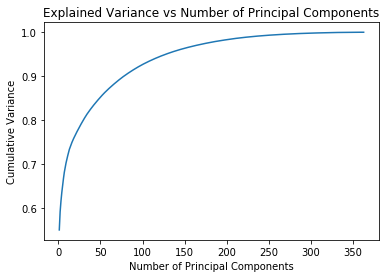

In [63]:
# Creating a plot for explained variance vs the number of principal components for all the components
create_variance_plot(explained_variance_ratio, len(explained_variance_ratio))

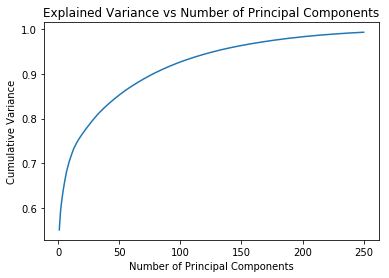

In [64]:
# Creating a plot for explained variance vs the number of principal components for the first 250 components
create_variance_plot(explained_variance_ratio, 250)

In [13]:
print(explained_var_cumulative[100])

0.9276566172565575


In [14]:
# Reducing the dimensionality of the data using 100 principal components
pca_100 = PCA(n_components=100)
customer_data_reduced = pca_100.fit_transform(customer_data_scaled)

In [15]:
print(customer_data_reduced[:5])

[[-2.74897068e+00 -6.83000719e-01 -1.75307268e+00 -8.73162616e-01
   8.97134218e-04 -1.08473286e-01  3.67917541e-01 -1.31980708e-01
  -3.27116552e-01  2.36320117e-01 -1.23434538e-01 -1.52758050e-01
   6.90891421e-02 -3.29521660e-01  1.33026017e-01  2.38378491e-01
  -8.02077930e-02  2.77940978e-01 -4.75776628e-02  2.88456010e-01
  -2.09465708e-02 -3.39405630e-01  8.52047111e-01  3.84877689e-01
  -5.63067483e-01  3.16546938e-01  4.03066506e-01  5.45273509e-02
   6.01937009e-01 -2.45954542e-01  6.69866286e-02 -3.96962385e-01
   3.24075525e-01 -2.72071916e-01  1.81847125e-01 -3.73600989e-03
   2.09431972e-01 -1.34909420e-01 -3.19930536e-01 -2.16909355e-02
   6.36773446e-02 -2.21336008e-01 -3.38636999e-01  3.67306501e-01
  -1.20204752e-01 -1.12937511e-01 -8.49792976e-02  4.62957229e-01
  -7.97865384e-02 -2.25236516e-01 -2.38819303e-01 -4.89018502e-01
  -1.67712818e-01  1.03549990e-01 -5.45206657e-02  2.30024821e-01
  -2.23799058e-02  1.53418884e-01 -1.41561743e-01 -1.09538095e-01
   4.62774

In [16]:
# Creating a dataframe that contains the correlations between a principal component and the features
component_makeup = pd.DataFrame(pca_100.components_, columns=customer_data.columns, index=[*range(1, 101)])

In [17]:
component_makeup.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,...,WOHNLAGE,ZABEOTYP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB,SINGLE_BUYER,MULTI_BUYER,COSMETIC_AND_FOOD,COSMETIC,FOOD
1,-0.044586,-0.026148,-0.057094,-0.041952,-0.001072,-0.004521,-0.012492,-0.015285,-0.001429,-0.016820,...,-0.054918,0.014415,0.001432,0.020567,-0.022343,0.005284,-0.005284,-0.004831,0.001967,0.002864
2,-0.018081,-0.017172,0.105949,0.052613,-0.005026,-0.001714,0.011464,0.028992,-0.006739,0.001624,...,0.012532,-0.059281,0.035009,-0.081829,-0.008442,0.061430,-0.061430,-0.067484,0.023480,0.044005
3,-0.050082,0.025662,0.029079,0.038009,0.004502,0.001089,0.004419,-0.005786,0.005740,-0.001056,...,0.005942,0.079637,0.035614,0.257415,-0.016591,0.353961,-0.353961,-0.364140,0.118958,0.245182
4,-0.031476,0.025673,0.037885,0.031912,0.005930,0.002091,0.006614,0.002151,0.007623,0.001844,...,-0.034156,0.062655,0.038975,0.110662,-0.017704,-0.357491,0.357491,0.371883,-0.148282,-0.223602
5,0.074601,-0.001698,-0.016877,-0.011225,0.003957,0.002672,-0.004640,0.000943,0.005174,0.003901,...,-0.140087,-0.024926,0.005656,-0.142243,0.006864,0.103524,-0.103524,-0.126744,0.121449,0.005295


In [18]:
# Making sure all 100 principal components are in the dataframe
len(component_makeup.index)

100

In [19]:
# Finding the most influential features of every principal component

# Dictionary that will hold the names of the most important features for every principal component
important_features_dict = {}

# Counter for the row index
i = 1
# Iterate through all the principal components
for i in range(1, 101):
    # Adding a key for the principal component
    new_key = "PC" + str(i)
    # Creating an empty list for the component
    important_features_dict[new_key] = []
    # Iterate through all the columns
    for feature in component_makeup.columns:
        # Add the name of the column and correlation coefficient if there is a strong correlation
        if component_makeup.loc[i, feature] >= 0.2 or component_makeup.loc[i, feature] <= -0.2:
            important_features_dict[new_key].append((feature, component_makeup.loc[i, feature]))

In [20]:
print(important_features_dict)

{'PC1': [], 'PC2': [('D19_GESAMT_ONLINE_QUOTE_12', 0.20151695043246737)], 'PC3': [('ANREDE_KZ', 0.2574145533663401), ('SINGLE_BUYER', 0.35396145552114333), ('MULTI_BUYER', -0.3539614555211433), ('COSMETIC_AND_FOOD', -0.36414008487083893), ('FOOD', 0.2451823704488123)], 'PC4': [('SINGLE_BUYER', -0.3574913582164754), ('MULTI_BUYER', 0.3574913582164753), ('COSMETIC_AND_FOOD', 0.37188349305147256), ('FOOD', -0.2236019180156324)], 'PC5': [('GREEN_AVANTGARDE', 0.23376134727842032)], 'PC6': [('SEMIO_ERL', 0.21597824514282993), ('SEMIO_FAM', -0.2151801961919586), ('SEMIO_KULT', -0.24220188007721183), ('ANREDE_KZ', 0.41369645813849276)], 'PC7': [('ANREDE_KZ', 0.24061055992421604)], 'PC8': [], 'PC9': [('D19_GESAMT_ONLINE_QUOTE_12', -0.20113097268355987), ('LP_FAMILIE_FEIN', 0.3809276152374599), ('LP_FAMILIE_GROB', 0.33142958192105776), ('LP_LEBENSPHASE_FEIN', 0.30848731697389176), ('LP_LEBENSPHASE_GROB', 0.32805588809350184)], 'PC10': [('LP_LEBENSPHASE_FEIN', -0.20774613209554418), ('LP_LEBENSPH

In [21]:
# Finding the optimal value of k, for the number of clusters in K means clustering

# Importing the K means model
from sklearn.cluster import KMeans

# For storing the distortion, the sum of squared distances of samples to their closest cluster center, for each iterations
distortions = []

# Trying different values for k, between 1 and 100
for k in range(1, 50):
    # Defining a k means model with the value of k for the iteration and with 100 iterations max
    kmeans = KMeans(n_clusters=k, 
                    max_iter=100)
    
    # Fitting the k means model to the dimensionality reduced customer data
    kmeans.fit(customer_data_reduced)
    
    # Appending the distortion value to the list
    distortions.append(kmeans.inertia_)
    

Text(0, 0.5, 'Distortion')

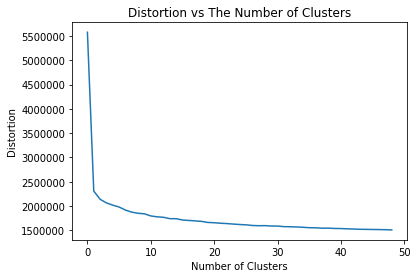

In [24]:
plt.plot(distortions)
plt.title("Distortion vs The Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")

In [48]:
# Test using a PCA model with the unnormalized data

# Defining the maximum number of principal components to fit the model
num_components = len(list(customer_data.columns)) - 1

# Creating a PCA model
pca = PCA(n_components=num_components)

# Fitting the PCA model
pca.fit(customer_data)

PCA(copy=True, iterated_power='auto', n_components=363, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[7.67335018e-01 1.87111768e-01 3.25792935e-02 1.23050439e-02
 1.49945704e-04 1.20514956e-04 7.14721865e-05 4.82929112e-05
 3.74820815e-05 2.37657140e-05 2.22471283e-05 1.37888072e-05
 1.00935211e-05 5.77980460e-06 5.68091152e-06 5.15706887e-06
 4.69781134e-06 4.19423534e-06 3.98388313e-06 3.81104463e-06
 3.67447413e-06 2.90460272e-06 2.83111954e-06 2.52186478e-06
 2.44617787e-06 2.35156217e-06 2.19396627e-06 2.12683531e-06
 2.09559557e-06 2.05433513e-06 2.01976776e-06 2.00449404e-06
 1.91594385e-06 1.89919359e-06 1.87089862e-06 1.83417299e-06
 1.75617769e-06 1.75015237e-06 1.69594356e-06 1.65479929e-06
 1.58815922e-06 1.56644211e-06 1.52907976e-06 1.48544970e-06
 1.47063951e-06 1.43801247e-06 1.39248492e-06 1.36992319e-06
 1.33059609e-06 1.30015416e-06 1.28350875e-06 1.26346047e-06
 1.22178470e-06 1.20485983e-06 1.15633764e-06 1.14022143e-06
 1.08660150e-06 1.06058034e-06 1.04480503e-06 9.89149938e-07
 9.85063395e-07 9.69763262e-07 9.47813201e-07 9.38390687e-07
 9.20089323e-07 9.171494

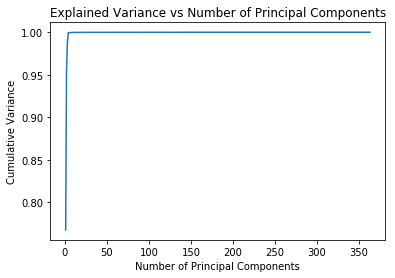

In [59]:
# Creating a plot for explained variance vs the number of principal components for all components
create_variance_plot(explained_variance_ratio, len(explained_variance_ratio))

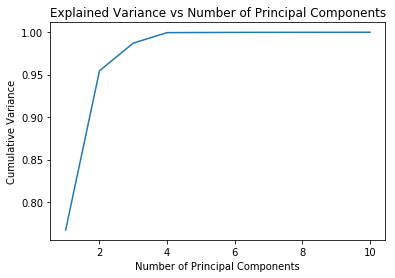

In [60]:
# Creating a plot for explained variance vs the number of principal components for the first 10 components
create_variance_plot(explained_variance_ratio, 10)

Text(0, 0.5, 'Cumulative Variance')

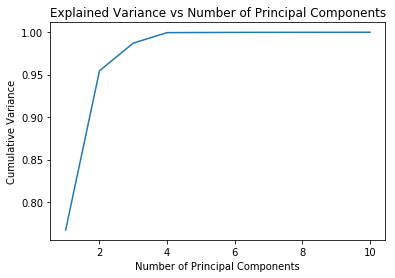

In [51]:
# Decreasing the number of principal components in order to see the elbow more clearly
plt.plot(x_axis[:10], explained_var_cumulative[:10])
plt.title("Explained Variance vs Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")

In [52]:
explained_var_cumulative[:10]

array([0.76733502, 0.95444679, 0.98702608, 0.99933112, 0.99948107,
       0.99960158, 0.99967306, 0.99972135, 0.99975883, 0.9997826 ])

In [41]:
# Implementing random forest for dimensionality reduction since using PCA does not give accurate results

# Importing the random forest model from scikit learn
from sklearn.ensemble import RandomForestClassifier

# Creating the random forest model
rf_classifier = RandomForestClassifier(oob_score=True)

# Creating a feature matrix and label vector from the train data
X_train = train_data.loc[:, train_data.columns != 'RESPONSE']
y_train = train_data['RESPONSE']

# Training the model using the train_data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
feature_importances = rf_classifier.feature_importances_
feature_importances.sort()
print(feature_importances)

[0.00014384 0.00020396 0.00028125 0.00042558 0.00048461 0.00050798
 0.00051948 0.00052258 0.00057782 0.0006398  0.00072168 0.00073358
 0.00080402 0.00080498 0.00081837 0.00082894 0.00090489 0.0009641
 0.00102231 0.00104652 0.00105441 0.00105587 0.00105749 0.00111567
 0.00112895 0.00114537 0.0011459  0.00116037 0.0011629  0.00117999
 0.00118114 0.00118941 0.00120036 0.00122214 0.00123765 0.00124536
 0.00125786 0.00129405 0.00133716 0.00136398 0.00139615 0.00140837
 0.00140993 0.00141782 0.00142636 0.00143664 0.00146727 0.00146936
 0.00150802 0.00153188 0.00153315 0.00154302 0.00155203 0.00155996
 0.00157367 0.00159942 0.00160466 0.00163    0.00163613 0.00165214
 0.00165858 0.0016686  0.00168325 0.00169788 0.00170015 0.00171166
 0.00176192 0.00177261 0.00177595 0.00177983 0.0018333  0.00185163
 0.00185718 0.0018755  0.00187578 0.00188858 0.0018958  0.00191585
 0.00194435 0.00195609 0.0019606  0.0019716  0.00197839 0.00201523
 0.00202255 0.00202353 0.00205106 0.00205293 0.00206352 0.00207

In [44]:
print(rf_classifier.oob_score_)

0.9875905101161789


In [31]:
train_data['RESPONSE']

0        0
1        0
2        0
3        0
4        0
        ..
42946    0
42947    0
42948    0
42949    0
42950    0
Name: RESPONSE, Length: 42951, dtype: int64

In [36]:
X_train.shape

(42951, 358)

In [46]:
# Test
X_test = test_data.loc[:, test_data.columns != 'RESPONSE']



In [39]:
y_pred = rf_classifier.predict(X_train)

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred))

0.998463365230146


In [43]:
print(accuracy_score(y_train, rf_classifier.classes_))

ValueError: Found input variables with inconsistent numbers of samples: [42951, 2]

In [47]:
y_pred_2 = rf_classifier.predict(X_test)